# Deep Learning Medical Image Analysis PneumoniaMNIST Part 2

Source For Codes

1.https://colab.research.google.com/drive/1LRlehId853iY2QytjFdZJuNb4mJfdNoY?usp=sharing

2.https://machinelearningknowledge.ai/keras-dense-layer-explained-for-beginners/

3.https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

## Python Imports

In [ ]:
# Built-in Imports
import random

In [ ]:
# Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Keras Imports
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import get_file, to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Dataset Downloader

In [ ]:
DATA_NAME = "PneumoniaMNIST"

In [ ]:
!wget https://raw.githubusercontent.com/MedMNIST/MedMNIST/main/medmnist/info.py
from info import INFO
data = INFO[DATA_NAME.lower()]

--2023-03-31 13:23:06--  https://raw.githubusercontent.com/MedMNIST/MedMNIST/main/medmnist/info.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22841 (22K) [text/plain]
Saving to: ‘info.py’

info.py             100%[===================>]  22.31K  --.-KB/s    in 0.002s  

2023-03-31 13:23:06 (11.9 MB/s) - ‘info.py’ saved [22841/22841]



In [ ]:
# Downloads the dataset file hosted on Zenodo.
file_path = get_file(fname="dataset.npz", 
                     origin=data["url"], 
                     md5_hash=data["MD5"])

4170669/4170669 [==============================] - 8s 2us/step


In [ ]:
# Loads the downloaded NumPy object.
dataset = np.load(file_path)

# Gets the training images and labels from the NumPy object.
train_x = dataset["train_images"]
train_y = dataset["train_labels"]

# Gets the validation images and labels from the NumPy object.
val_x = dataset["val_images"]
val_y = dataset["val_labels"]

# Gets the testing images and labels from the NumPy object.
test_x = dataset["test_images"]
test_y = dataset["test_labels"]

## Data Exploration

In [ ]:
# Declares a list of labels.
labels = list(data["label"].values()) + ["total"]

# Gets the counts for each label in each of our datasets.
_, train_counts = np.unique(train_y, return_counts=True)
_, val_counts = np.unique(val_y, return_counts=True)
_, test_counts = np.unique(test_y, return_counts=True)

# Prints the counts for each label from each dataset.
print(pd.DataFrame(list(zip(np.append(train_counts, [sum(train_counts)]), 
                            np.append(val_counts, [sum(val_counts)]), 
                            np.append(test_counts, [sum(test_counts)]))), 
                   index=labels, columns=["Train", "Val", "Test"]))

           Train  Val  Test
normal      1214  135   234
pneumonia   3494  389   390
total       4708  524   624


2328: pneumonia


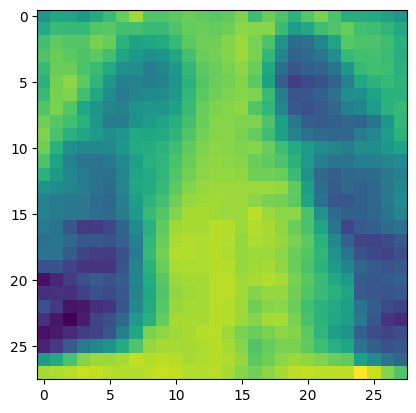

In [ ]:
# Displays a random image from training dataset.
index = random.randint(0, len(train_x))
print(f"{index}: {labels[train_y[index][0]]}")
plt.imshow(train_x[random.randint(0, len(train_x))])

## Data Processing and reshaping to fit the model architecture

In [ ]:
# Defines the data generator that will be used to augment the images as they are loaded.
data_generator = ImageDataGenerator(featurewise_center=True,
                                    featurewise_std_normalization=True,
                                    horizontal_flip=True, 
                                    vertical_flip=True)

In [ ]:
print(train_x.shape)
print(val_x.shape)

(4708, 28, 28)
(524, 28, 28)


In [ ]:
#reshaped the input images to match the data generator augmented images
train_x = train_x.reshape((4708, 28, 28, 1))
val_x = val_x.reshape((524, 28, 28, 1))
test_x = test_x.reshape((624, 28, 28, 1))


In [ ]:
#Appending both train and validation sets to input
data_generator.fit(np.append(train_x, val_x, 0))

In [ ]:
print(train_x.shape)
print(val_x.shape)
print(test_x.shape)

(4708, 28, 28, 1)
(524, 28, 28, 1)
(624, 28, 28, 1)


In [ ]:
#reshaping the input features to match the input layer of the sequntial model
train_x = np.reshape(train_x, (4708, 28 * 28 * 1))
val_x = np.reshape(val_x, (524, 28 * 28 * 1))
test_x = np.reshape(test_x, (624, 28 * 28 * 1))

In [ ]:
#importing other relavent libraries
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras

In [ ]:
#Defining the model architecture
model2 = keras.Sequential()
model2.add(keras.layers.Dense(128, activation='relu', input_dim=1*28*28))
#model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(keras.layers.Dense(32, activation='relu'))
model2.add(keras.layers.Dense(2, activation='sigmoid'))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 110,882
Trainable params: 110,882
Non-trainable params: 0
_________________________________________________________________


**"tf.keras.utils.to_categorical" using this output shape is changed to 2 binary classes to match the network in the Part 1**

In [ ]:
#Compile of the model
model2.compile(optimizer=keras.optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

train_y = tf.keras.utils.to_categorical(train_y, num_classes=2)

In [ ]:
test_y = tf.keras.utils.to_categorical(test_y, num_classes=2)
val_y = tf.keras.utils.to_categorical(val_y, num_classes=2)

In [ ]:
print(test_y)
print(val_y)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [ ]:
#training of the model
history = model2.fit(train_x, train_y,
                    epochs=10,
                    batch_size=20,
                    validation_data=(val_x, val_y))

Epoch 1/10
236/236 [==============================] - 1s 3ms/step - loss: 6.5323 - accuracy: 0.7606 - val_loss: 1.5126 - val_accuracy: 0.7424
Epoch 2/10
236/236 [==============================] - 1s 3ms/step - loss: 1.0399 - accuracy: 0.8303 - val_loss: 0.8508 - val_accuracy: 0.8435
Epoch 3/10
236/236 [==============================] - 1s 2ms/step - loss: 0.5449 - accuracy: 0.8613 - val_loss: 0.2196 - val_accuracy: 0.9179
Epoch 4/10
236/236 [==============================] - 1s 2ms/step - loss: 0.3378 - accuracy: 0.8917 - val_loss: 0.5774 - val_accuracy: 0.9256
Epoch 5/10
236/236 [==============================] - 1s 2ms/step - loss: 0.2671 - accuracy: 0.9021 - val_loss: 0.2356 - val_accuracy: 0.8950
Epoch 6/10
236/236 [==============================] - 1s 2ms/step - loss: 0.2533 - accuracy: 0.9055 - val_loss: 0.3482 - val_accuracy: 0.8626
Epoch 7/10
236/236 [==============================] - 1s 2ms/step - loss: 0.2330 - accuracy: 0.9136 - val_loss: 0.2486 - val_accuracy: 0.9237
Epoch 

##Test Data

Checking Accuracy on test Data

Predicting labels on test_x using the trained model and evaluating how well the model predicts the correct label by comparing test_y labels.

In [ ]:
model2.predict(test_x)

20/20 [==============================] - 0s 1ms/step


array([[8.0588485e-08, 1.0000000e+00],
       [7.1559509e-09, 1.0000000e+00],
       [7.8278974e-02, 9.3588305e-01],
       ...,
       [6.8212968e-01, 3.5200933e-01],
       [3.5006996e-02, 9.7175205e-01],
       [4.3124506e-01, 6.0557210e-01]], dtype=float32)

In [ ]:
model2.evaluate(test_x,test_y)

20/20 [==============================] - 0s 1ms/step - loss: 0.9884 - accuracy: 0.8013


[0.9883854985237122, 0.8012820482254028]

##Plotting Learning Curves

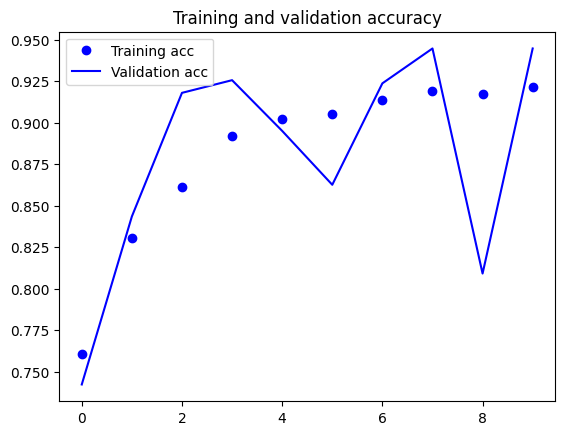

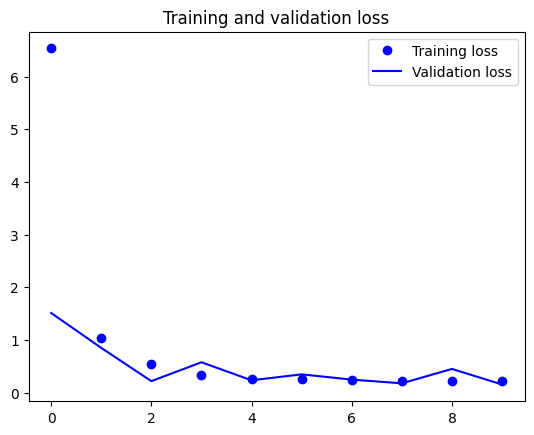

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

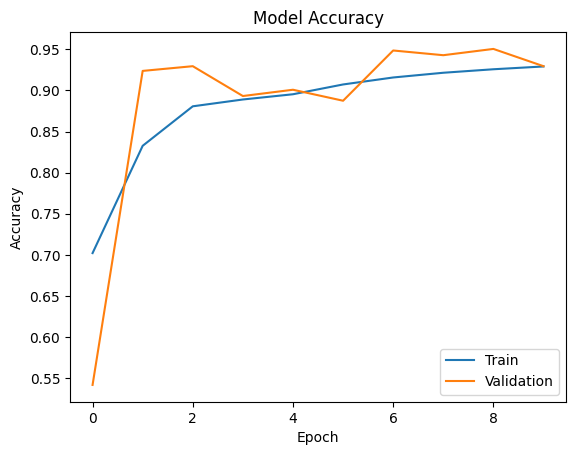

In [ ]:
# Plots the training and validation accuracy over the number of epochs.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

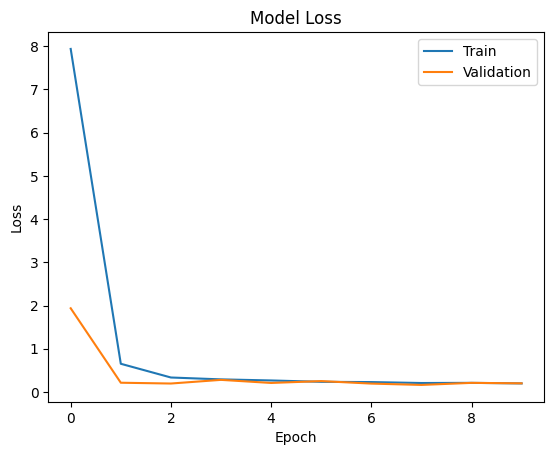

In [ ]:
# Plots the training and validation loss over the number of epochs.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

##Discussion

Loss function was change to binary crossentropy(to predict the difference of actual binary and predicted distributions) as this is a binary classification task

Input layer identifies shape of input using train_x.

Above graph on accuracy shows that while training the model, accuracy increses over training epochs.

Loss graph shows while training the model loss gradually decreses.

Accuracy of the model in training phase is 0.92 and loss is 0.22.

**Accuracy and Loss values on test data**

loss: 0.98
accuracy: 0.80

Below table shows comparsion of other model performance.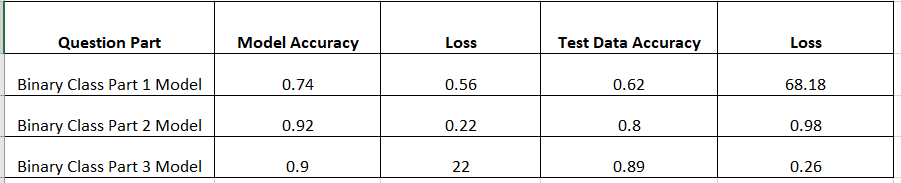

Model two has better performance than the model 1 with loss of 0.98 and test data accuracy is 0.8.